In [1]:
import os
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt

### Movie Dataset

In [2]:
movie_info = pd.read_csv("input/movie_dataset/img.csv")
movie_info

,id,genre,action,adventure,comedy,crime,drama,romance,sci-fi,thriller
0,tt0118771,"Action, Crime, Drama",1,0,0,1,1,0,0,0
1,tt1388394,Drama,0,0,0,0,1,0,0,0
2,tt0267248,Drama,0,0,0,0,1,0,0,0
3,tt0878804,Drama,0,0,0,0,1,0,0,0
4,tt0485522,"Drama, Romance",0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,tt0117688,"Action, Sci-Fi, Thriller",1,0,0,0,0,0,1,1
996,tt0279889,"Comedy, Drama",0,0,1,0,1,0,0,0
997,tt0098627,Comedy,0,0,1,0,0,0,0,0
998,tt0086361,"Drama, Romance",0,0,0,0,1,1,0,0


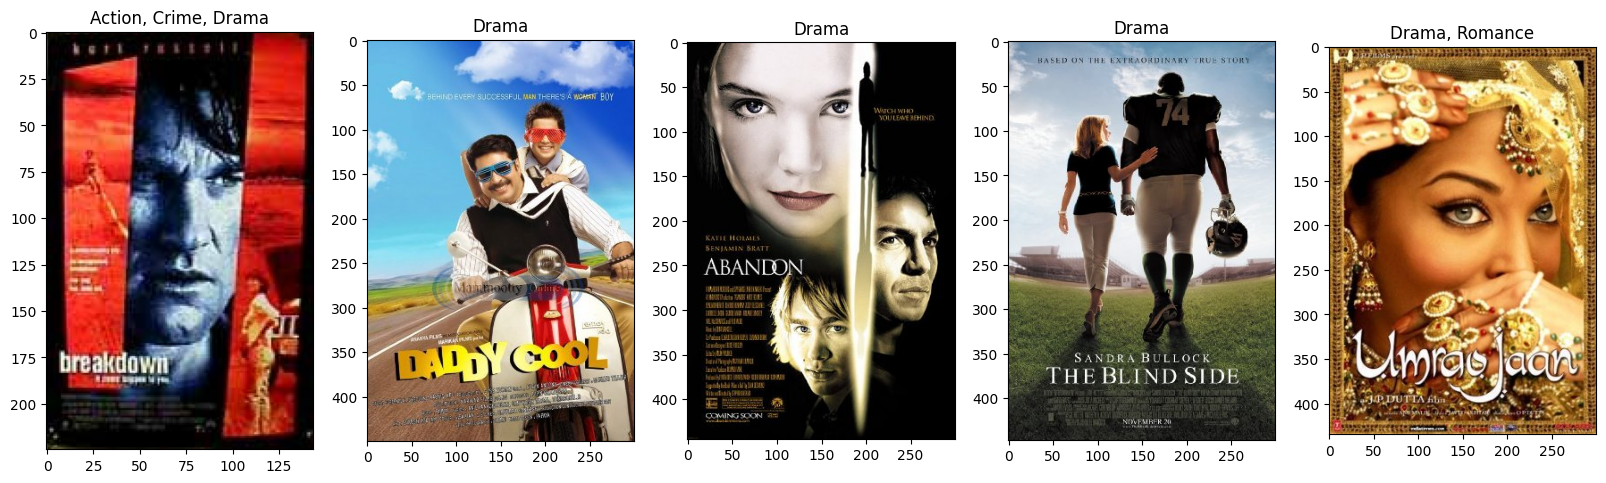

In [3]:
show_num = 5

fig, ax = plt.subplots(1, show_num, figsize= (20,10))

for i in range(show_num):
    img = cv2.imread(f"input/movie_dataset/img/{movie_info['id'][i]}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    ax[i].imshow(img)
    ax[i].set_title(f"{movie_info['genre'][i]}")

plt.show()

### User Dataset

In [4]:
n_users = 100                   # Number of synthetic users to generate
min_likes = 0                   # Minimum number of movies a user can like
max_likes = 20                  # Maximum number of movies a user can like
num_recent_per_user = 5         # Number of recently watched movies per user

# Extract all movie ids
all_movies = [f[:-4] for f in os.listdir("input/movie_dataset/img") if f.endswith(".jpg")]

# Generate synthetic users
users = []

for i in range(n_users):
    # Create unique user_id
    user_id = f"user_{i+1:03d}"

    # Sample recent movies (what the user has recently watched)
    recently_watched = random.sample(all_movies, num_recent_per_user)

    # Sample liked movies (can overlap with recently_watched)
    num_likes = random.randint(min_likes, max_likes)
    liked_movies = random.sample(all_movies, min(num_likes, len(all_movies)))

    users.append({
        "user_id": user_id,
        "recently_watched": recently_watched,       # List of 5 recently watched movies
        "liked_movies": liked_movies                # List of liked movies (0 to 20)
    })

users[:1]

[{'user_id': 'user_001',
  'recently_watched': ['tt0118863',
   'tt1866249',
   'tt0090329',
   'tt0101252',
   'tt0118929'],
  'liked_movies': ['tt2130282',
   'tt0119695',
   'tt0418206',
   'tt1790864',
   'tt0281373',
   'tt0117688',
   'tt0317950',
   'tt0113737',
   'tt0347368',
   'tt0488414',
   'tt1166100',
   'tt0196857']}]

### Extract User Likes

In [5]:
liked_rows = []

for user in users:
    for movie_id in user["liked_movies"]:
        liked_rows.append({"user_id": user["user_id"], "movie_id": movie_id})

liked_df = pd.DataFrame(liked_rows)

# Export DataFrame
liked_df.to_csv("input/user_likes.csv", index=False)

liked_df

,user_id,movie_id
0,user_001,tt2130282
1,user_001,tt0119695
2,user_001,tt0418206
3,user_001,tt1790864
4,user_001,tt0281373
...,...,...
1157,user_100,tt2706264
1158,user_100,tt2017038
1159,user_100,tt1629376
1160,user_100,tt0086873


### Get User Recently Watched

In [6]:
recent_rows = []

for user in users:
    for i, movie_id in enumerate(user["recently_watched"]):
        recent_rows.append({
            "user_id": user["user_id"],
            "movie_id": movie_id,
            "recency_rank": i + 1          # 1 = most recent, 5 = least recent
        })

recent_df = pd.DataFrame(recent_rows)

# Export DataFrame
recent_df.to_csv("input/user_recent.csv", index=False)

recent_df

,user_id,movie_id,recency_rank
0,user_001,tt0118863,1
1,user_001,tt1866249,2
2,user_001,tt0090329,3
3,user_001,tt0101252,4
4,user_001,tt0118929,5
...,...,...,...
495,user_100,tt0120686,1
496,user_100,tt0113501,2
497,user_100,tt1629376,3
498,user_100,tt1981080,4
